### Dataset Visualizations

Dataset used: [Metro dataset](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

##### Features:
* holiday: US National Holiday + Minnesota State Holiday
* temp: average Temperature in Kelvin
* rain_1h: mm or Rain
* snow_1h: mm of Snow
* clouds_all: percentage of cloud cover
* weather_main: short text descr. of weather
* weather_description: longer text descr. of weather
* date_time: datetime
* traffic_volume: westbound Traffic Volume (Ground Truth)

In [19]:
# All imports needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [20]:
# Read data from file
df = pd.read_csv("../data/metro/metro_raw.csv")
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [21]:
# Showing missing values in metro dataset (none)
null_vals = df[df.isnull().values.any(axis=1)]
null_vals.shape

(0, 9)

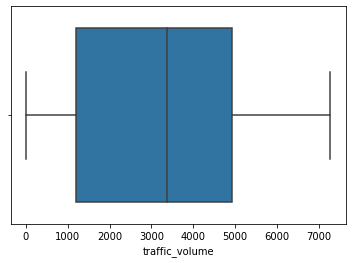

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot('traffic_volume', data = df)
plt.show()

In [23]:
# show categorical features
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(
        col_name=col_name, unique_cat=unique_cat))

Feature 'holiday' has 12 unique categories
Feature 'weather_main' has 11 unique categories
Feature 'weather_description' has 38 unique categories
Feature 'date_time' has 40575 unique categories


In [24]:
# clean up holiday feature
df['holiday'] = [0 if x == 'None' else 1 for x in df['holiday']]
print(df['holiday'].value_counts())

0    48143
1       61
Name: holiday, dtype: int64


In [25]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,0,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,0,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,0,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,0,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


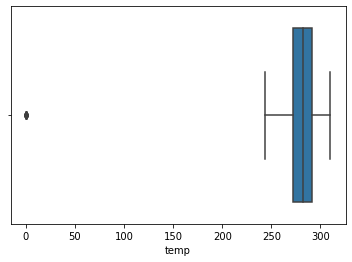

In [26]:
# shows that temp has unnatural outliers
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = df)
plt.show()

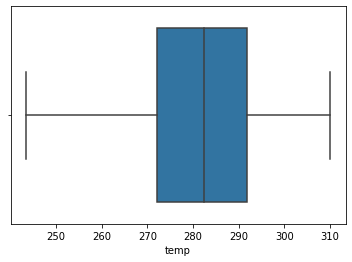

In [27]:
# remove errors
df = df.loc[df['temp']>20]
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = df)
plt.show()

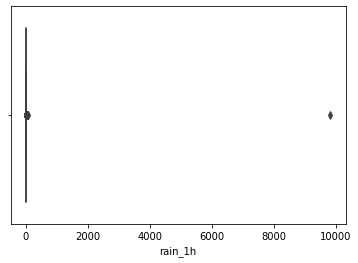

In [28]:
# shows that rain_1h has unnatural outliers
plt.figure(figsize=(6,4))
sns.boxplot('rain_1h', data = df)
plt.show()

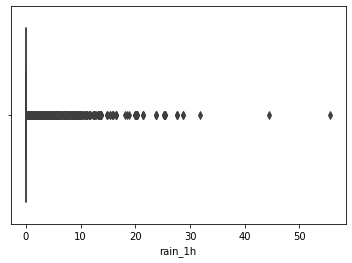

In [29]:
# remove errors
df = df.loc[df['rain_1h']<8000]
plt.figure(figsize=(6,4))
sns.boxplot('rain_1h', data = df)
plt.show()

In [30]:
# rain and snow
df['rain_1h'] = [0 if x == 0 else 1 for x in df['rain_1h']]
df['snow_1h'] = [0 if x == 0 else 1 for x in df['snow_1h']]
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,0,288.28,0,0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,0,289.36,0,0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,0,289.58,0,0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,0,290.13,0,0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,0,291.14,0,0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


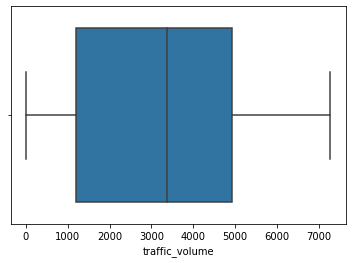

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot('traffic_volume', data = df)
plt.show()

In [32]:
# clean up date_time feature --> split to weekday and hour

datetime = pd.to_datetime(df['date_time'])
df['weekday'] = datetime.dt.dayofweek
df['hour'] = datetime.dt.hour
df = df.drop('date_time',1)

In [33]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,weekday,hour
0,0,288.28,0,0,40,Clouds,scattered clouds,5545,1,9
1,0,289.36,0,0,75,Clouds,broken clouds,4516,1,10
2,0,289.58,0,0,90,Clouds,overcast clouds,4767,1,11
3,0,290.13,0,0,90,Clouds,overcast clouds,5026,1,12
4,0,291.14,0,0,75,Clouds,broken clouds,4918,1,13


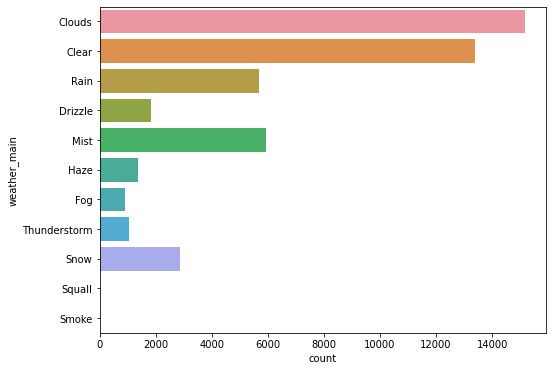

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(y='weather_main', data = df)
plt.show()

In [35]:
df['good_weather'] = [1 if x in ['Clouds', 'Clear'] else 0 for x in df['weather_main']]
df = df.drop('weather_main',1)
df = df.drop('weather_description',1)

In [36]:
df.to_csv('../data/metro/metro.csv', index=False)
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weekday,hour,good_weather
0,0,288.28,0,0,40,5545,1,9,1
1,0,289.36,0,0,75,4516,1,10,1
2,0,289.58,0,0,90,4767,1,11,1
3,0,290.13,0,0,90,5026,1,12,1
4,0,291.14,0,0,75,4918,1,13,1
